*   NOTE: this notebook was made in colab. running it in jupyter might yield different results)
*   https://colab.research.google.com/drive/1LoBMorN-qvBXFmLyFbX6UsL9T65yKqOR?usp=sharing

Authors:

*   Adam Davidson
*   Hen Poretzky
*   Sagiv Tura 





# 1. Business Understanding



For this project we have chosen a dataset that contains information of baseball players in the MLB. The data describes attribute totals and averages as they were recorded in the player's games over their careers.
In this project we will try to predict the "Hall of Fame" column, and try to predict which players are and will be inducted to the Baseball Hall of Fame. Various machine learning and data mining techniques will be used to achieve this goal, including feature selection, normalizations, building a pipeline and running machine learning models to predict our target.

# 2. Data Understanding

In [ ]:
# General imports

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import *
from tqdm.notebook import tqdm as tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
import missingno as msno
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, SCORERS, mean_squared_error, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import shuffle, resample

In [ ]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/adamnd1190/ml-project/main/csv_result-dataset_189_baseball.csv'
df = pd.read_csv(url)
df.head()

,id,Player,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,1,HANK_AARON,23,3298,12364,2174,3771,624,98,755,2297,1402,1383.0,0.305,0.377,0.555,0.980,Outfield,1
1,2,JERRY_ADAIR,13,1165,4019,378,1022,163,19,57,366,208,499.0,0.254,0.294,0.347,0.985,Second_base,0
2,3,SPARKY_ADAMS,13,1424,5557,844,1588,249,48,9,394,453,223.0,0.286,0.343,0.353,0.974,Second_base,0
3,4,BOBBY_ADAMS,14,1281,4019,591,1082,188,49,37,303,414,447.0,0.269,0.340,0.368,0.955,Third_base,0
4,5,JOE_ADCOCK,17,1959,6606,823,1832,295,35,336,1122,594,1059.0,0.277,0.339,0.485,0.994,First_base,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1340 non-null   int64  
 1   Player           1340 non-null   object 
 2   Number_seasons   1340 non-null   int64  
 3   Games_played     1340 non-null   int64  
 4   At_bats          1340 non-null   int64  
 5   Runs             1340 non-null   int64  
 6   Hits             1340 non-null   int64  
 7   Doubles          1340 non-null   int64  
 8   Triples          1340 non-null   int64  
 9   Home_runs        1340 non-null   int64  
 10  RBIs             1340 non-null   int64  
 11  Walks            1340 non-null   int64  
 12  Strikeouts       1320 non-null   float64
 13  Batting_average  1340 non-null   float64
 14  On_base_pct      1340 non-null   float64
 15  Slugging_pct     1340 non-null   float64
 16  Fielding_ave     1340 non-null   float64
 17  Position      

In [ ]:
df.describe()

,id,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Hall_of_Fame
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1320.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,13.485821,1331.263433,4534.612687,635.313433,1248.567164,203.225373,50.811940,85.109701,565.744776,445.584328,445.685606,0.268774,0.336064,0.385355,0.966370,0.144030
std,386.968991,3.136279,519.165125,2094.191124,376.400804,647.664709,116.576053,41.038358,97.930043,357.163666,295.214016,325.319204,0.026179,0.033701,0.060565,0.025193,0.474284
min,1.000000,10.000000,140.000000,252.000000,20.000000,48.000000,6.000000,0.000000,0.000000,21.000000,17.000000,0.000000,0.161000,0.194000,0.201000,0.820000,0.000000
25%,335.750000,11.000000,958.750000,2979.500000,355.000000,766.500000,116.000000,22.000000,22.000000,307.750000,232.000000,218.000000,0.252000,0.315000,0.343000,0.957000,0.000000
50%,670.500000,13.000000,1282.500000,4302.000000,575.000000,1168.000000,184.500000,40.000000,51.000000,486.000000,380.000000,365.500000,0.267000,0.335000,0.380000,0.973000,0.000000
75%,1005.250000,15.000000,1651.500000,5815.250000,843.250000,1613.000000,264.000000,69.000000,108.000000,735.250000,576.000000,593.000000,0.285000,0.357250,0.424000,0.983000,0.000000
max,1340.000000,26.000000,3562.000000,14053.000000,2246.000000,4256.000000,792.000000,309.000000,755.000000,2297.000000,2056.000000,2597.000000,0.366000,0.483000,0.690000,1.000000,2.000000


<Axes: title={'center': 'Position Distribution'}>

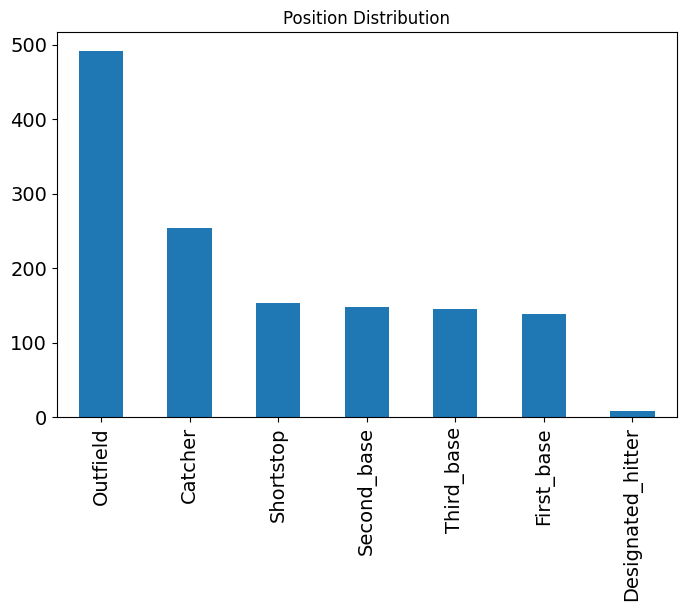

In [ ]:
df["Position"].value_counts().plot(kind="bar", title="Position Distribution", fontsize=14, figsize=(8,5))


<ipython-input-6-0daad3306c5c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


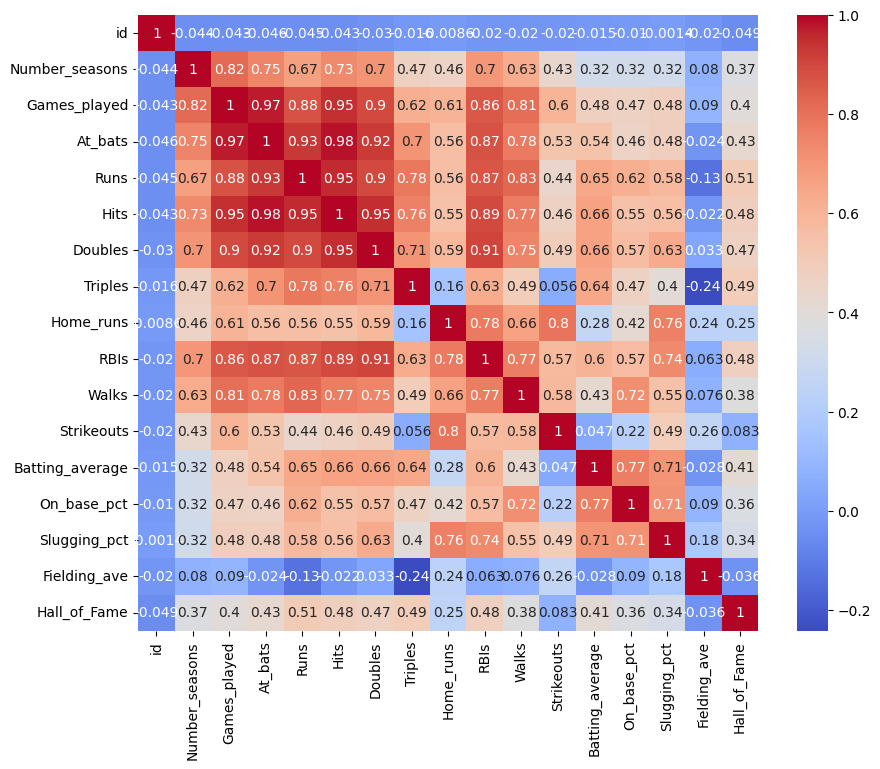

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

Here we can understand the structure of the missing data in our dataframe


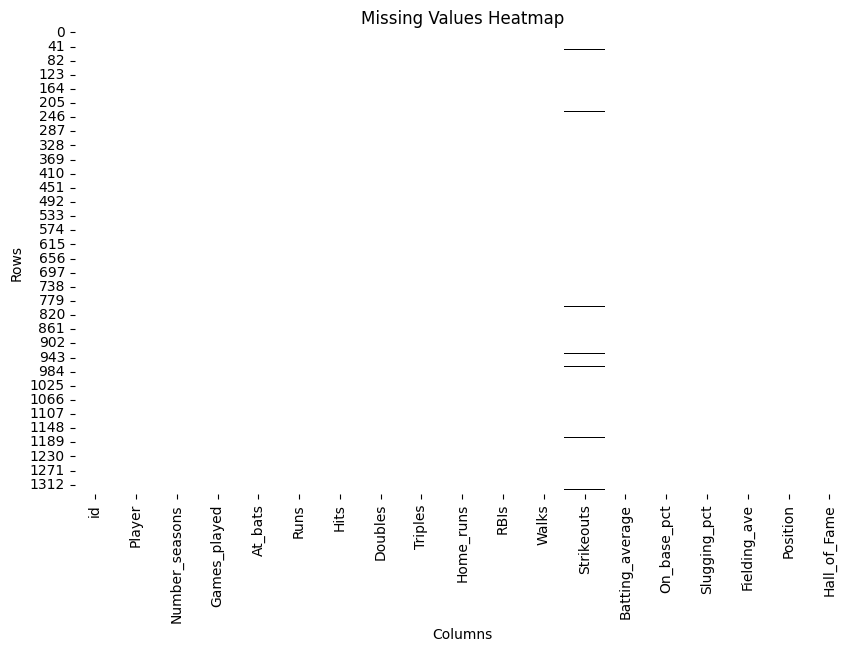

In [ ]:
missing_values = df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap="binary", cbar=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In our dataset, there are relatively few players that are in the hall of fame.

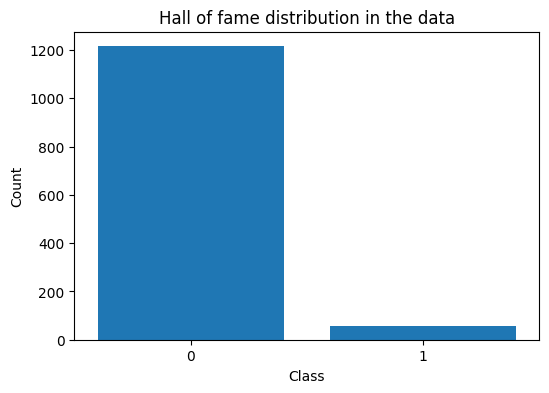

In [ ]:
class_counts = df['Hall_of_Fame'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Hall of fame distribution in the data')
plt.xlim([-0.5, 1.5])
plt.xticks([0, 1])
plt.show()

# 3. Data Preparation

# 3.1 Feature Engineering

Here we will start our preprocessing with removing rows with empty values. We found only 20 rows with missing data, all in the "Strikeouts" column. The problematic rows are only 1.5% of our total rows and we decided to remove those rows from the dataframe.
Our "position" column consists of strings so we encoded it into labels and the column into a categoric column. We also adjusted the "Hall of Fame" column that had the values 0, 1 and 2 into a boolean structure. The value 2 was intended for players inducted into the HoF pre 1930, but since the rest of the data is consistent with 'newer' players and doesn't impact our goal, we changed those values to '1'.

In [ ]:
df.shape

(1340, 19)

In [ ]:
def drop_na(data):
  data.dropna(inplace=True)

drop_na(df)
# Verify the updated DataFrame
df.shape

(1320, 19)

In [ ]:
# Create a LabelEncoder object
def lab_enc(data):
  encoder = LabelEncoder()
  df['Position'] = encoder.fit_transform(df['Position'])

lab_enc(df)

In [ ]:
# Convert "Position" column to categorical and hof values 2 to 1
def convert(data):
  df['Position'] = df['Position'].astype('category')
  df['Hall_of_Fame'] = df['Hall_of_Fame'].replace(2, 1)

convert(df)

In [ ]:
#  drop columns that are descriptions, not computational data
def remove_cols(data):
    cols_to_remove = ['id', 'Player']
    data = data.drop(cols_to_remove, axis=1, inplace=True)
    return data

remove_cols(df)
df.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,23,3298,12364,2174,3771,624,98,755,2297,1402,1383.0,0.305,0.377,0.555,0.980,3,1
1,13,1165,4019,378,1022,163,19,57,366,208,499.0,0.254,0.294,0.347,0.985,4,0
2,13,1424,5557,844,1588,249,48,9,394,453,223.0,0.286,0.343,0.353,0.974,4,0
3,14,1281,4019,591,1082,188,49,37,303,414,447.0,0.269,0.340,0.368,0.955,6,0
4,17,1959,6606,823,1832,295,35,336,1122,594,1059.0,0.277,0.339,0.485,0.994,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1339
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Number_seasons   1320 non-null   int64   
 1   Games_played     1320 non-null   int64   
 2   At_bats          1320 non-null   int64   
 3   Runs             1320 non-null   int64   
 4   Hits             1320 non-null   int64   
 5   Doubles          1320 non-null   int64   
 6   Triples          1320 non-null   int64   
 7   Home_runs        1320 non-null   int64   
 8   RBIs             1320 non-null   int64   
 9   Walks            1320 non-null   int64   
 10  Strikeouts       1320 non-null   float64 
 11  Batting_average  1320 non-null   float64 
 12  On_base_pct      1320 non-null   float64 
 13  Slugging_pct     1320 non-null   float64 
 14  Fielding_ave     1320 non-null   float64 
 15  Position         1320 non-null   category
 16  Hall_of_Fame     1320 non-null   int64   


# 3.2 Feature Selection

In this section we will split our dataset into X and y, and perform feature selection. We have used a Random Forest classifier to identify the top features, and then used and SVM model to go through the threshold range to select our desired threshold level to select our features.

In [ ]:
X = df.drop(['Hall_of_Fame'], axis=1)
y = df['Hall_of_Fame']

In [ ]:
def get_top_features(X, y, threshold):
    # Train a random forest classifier
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Get feature importances
    importances = clf.feature_importances_

    # Select features above the threshold
    selected_features = np.array(X.columns)[importances > threshold]

    return selected_features

In [ ]:
accuracy_scores = []

# Iterate over the range of thresholds
for threshold in np.arange(0.02, 1.0, 0.02):
    # Get the selected features based on the threshold
    selected_features = get_top_features(X, y, threshold)
    if len(selected_features) == 0:
      break

    # Filter the dataset to include only the selected features
    X_selected = X[selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train an SVM model
    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate the accuracy score and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    # Print the threshold and corresponding accuracy score
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}")
# Print all the accuracy scores together
#print("Accuracy scores:", accuracy_scores)

Threshold: 0.02, Accuracy: 0.9394
Threshold: 0.04, Accuracy: 0.9432
Threshold: 0.06, Accuracy: 0.9432
Threshold: 0.08, Accuracy: 0.9470
Threshold: 0.10, Accuracy: 0.9545
Threshold: 0.12, Accuracy: 0.9545
Threshold: 0.14, Accuracy: 0.9508


Although it is not the highest accuracy, we chose the 0.06 threshold to preserve a healthy amount of complexity for the upcoming prediction models.
Additionally, there are columns that we believe are important for the subject we are exploring in this work that appear in 0.06

In [ ]:
threshold = 0.06
get_top_features(X, y, threshold)

array(['At_bats', 'Runs', 'Hits', 'Doubles', 'RBIs', 'Batting_average'],
      dtype=object)

In [ ]:
# selecting the chosen features in a new df
selected_columns = ['At_bats', 'Runs', 'Hits', 'Doubles', 'RBIs', 'Batting_average', 'Slugging_pct']
X_new = X[selected_columns].copy()
X_new.head()

,At_bats,Runs,Hits,Doubles,RBIs,Batting_average,Slugging_pct
0,12364,2174,3771,624,2297,0.305,0.555
1,4019,378,1022,163,366,0.254,0.347
2,5557,844,1588,249,394,0.286,0.353
3,4019,591,1082,188,303,0.269,0.368
4,6606,823,1832,295,1122,0.277,0.485


In [ ]:
def plot_PCA(data, labels):
    pca = decomposition.PCA(n_components = 2)
    pca_data = pca.fit_transform(data)
    pca_data = np.vstack((pca_data.T, labels)).T
    df = pd.DataFrame(data=pca_data, columns=("dim1", "dim2", "Label"))
    sns.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("PCA")
    plt.show()

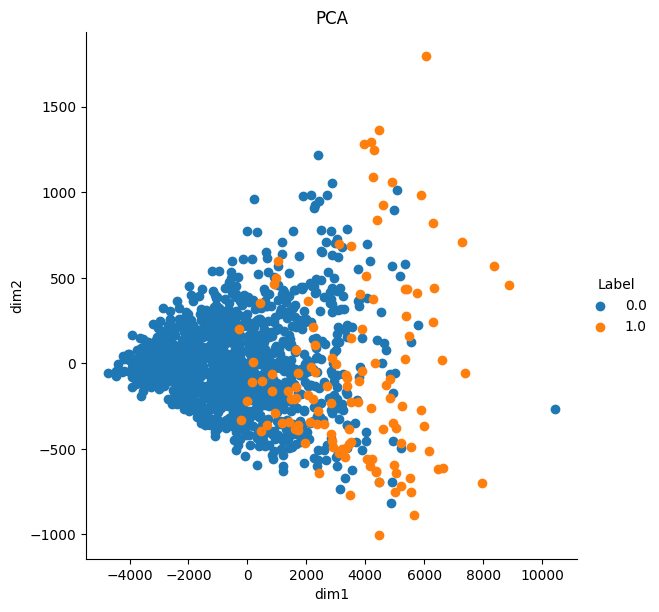

In [ ]:
plot_PCA(X,y)

# 3.3 Normalization and Standardization

In our selected features, we have 5 numeric columns and 2 percentage columns. we will use z score standartization on the numeric columns

In [ ]:
numeric_columns = ['At_bats', 'Runs', 'Hits', 'Doubles', 'RBIs']

scaler = StandardScaler()
X_new[numeric_columns] = scaler.fit_transform(X_new[numeric_columns])
X_new.head()

,At_bats,Runs,Hits,Doubles,RBIs,Batting_average,Slugging_pct
0,3.717644,4.066304,3.873078,3.587624,4.819911,0.305,0.555
1,-0.246764,-0.682503,-0.350105,-0.349496,-0.562115,0.254,0.347
2,0.483885,0.549649,0.519419,0.384978,-0.484075,0.286,0.353
3,-0.246764,-0.119309,-0.257929,-0.135986,-0.737707,0.269,0.368
4,0.982227,0.494123,0.894267,0.777836,1.544986,0.277,0.485


# 3.4 Pipelines

In [ ]:
url = 'https://raw.githubusercontent.com/adamnd1190/ml-project/main/csv_result-dataset_189_baseball.csv'
df_pline = pd.read_csv(url)

In [ ]:
def build_pipeline(data):
    return Pipeline(steps=[
    ('drop_na', drop_na(data)),
    ('lab_enc', lab_enc(data)),
    ('convert', convert(data)),
    ('remove_cols',remove_cols(data))
    ])

pipe = build_pipeline(df_pline)
df_pline.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,23,3298,12364,2174,3771,624,98,755,2297,1402,1383.0,0.305,0.377,0.555,0.980,Outfield,1
1,13,1165,4019,378,1022,163,19,57,366,208,499.0,0.254,0.294,0.347,0.985,Second_base,0
2,13,1424,5557,844,1588,249,48,9,394,453,223.0,0.286,0.343,0.353,0.974,Second_base,0
3,14,1281,4019,591,1082,188,49,37,303,414,447.0,0.269,0.340,0.368,0.955,Third_base,0
4,17,1959,6606,823,1832,295,35,336,1122,594,1059.0,0.277,0.339,0.485,0.994,First_base,0


# 4. Modeling

# 4.1 Model Selection

Here we are looking at 3 models: random forest, lightgbm and xgboost. we will perform our model selection by running the models with 5 cross validations.
We will evaluate the models by looking at the mean accuracies, f1-scores and recall scores.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0, test_size=0.25)


In [ ]:
# Define the models
random_forest = RandomForestClassifier()
lightgbm = LGBMClassifier()
adaboost = AdaBoostClassifier()

# Define the evaluation metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'F1 Score': make_scorer(f1_score, average='macro'),
    'Recall': make_scorer(recall_score, average='macro')
}

# Perform cross-validation and compute the scores
models = [random_forest, lightgbm, adaboost]
model_names = ['Random Forest', 'LightGBM', 'CatBoost']

for model, name in zip(models, model_names):
    scores = cross_validate(model, X_new, y, cv=5, scoring=scoring)
    mean_accuracy = scores['test_Accuracy'].mean()
    mean_f1 = scores['test_F1 Score'].mean()
    mean_recall = scores['test_Recall'].mean()
    print(f'{name} Mean Accuracy: {mean_accuracy:.4f}')
    print(f'{name} Mean F1 Score: {mean_f1:.4f}')
    print(f'{name} Mean Recall: {mean_recall:.4f}')

Random Forest Mean Accuracy: 0.9492
Random Forest Mean F1 Score: 0.8320
Random Forest Mean Recall: 0.7951
LightGBM Mean Accuracy: 0.9477
LightGBM Mean F1 Score: 0.8316
LightGBM Mean Recall: 0.7977
CatBoost Mean Accuracy: 0.9348
CatBoost Mean F1 Score: 0.8036
CatBoost Mean Recall: 0.7944


In our 3 cross validation metrics we defined to evaluate the models, the random forest model has the highest values.
To further investigate which model is the best, we will use the bias-variance method.

In [ ]:
def compute_bias_variance(clf, X, y):
    # Bootstraps
    n_repeat = 40
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat, random_state=0)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        clf.fit(X.iloc[train_index], y.iloc[train_index])
        y_pred = clf.predict(X.iloc[test_index])

        # Store predictions
        for j, index in enumerate(test_index):
            y_all_pred[index].append(y_pred[j])

    # Compute bias, variance, error
    bias_sq = sum([(1 - x.count(y[i]) / len(x)) ** 2 * len(x) / n_repeat for i, x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0) / len(x)) ** 2 + (x.count(1) / len(x)) ** 2)) / 2) * len(x) / n_repeat for i, x in
               enumerate(y_all_pred)])
    error = sum([(1 - x.count(y[i]) / len(x)) * len(x) / n_repeat for i, x in enumerate(y_all_pred)])

    return np.sqrt(bias_sq), var, error

def plot_bias_variance_rf(clf, X, y):
    bias_scores = []
    var_scores = []
    err_scores = []
    n_estimators = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    for i in n_estimators:
        b, v, e = compute_bias_variance(clf.set_params(random_state=0, n_estimators=i), X, y)
        bias_scores.append(b)
        var_scores.append(v)
        err_scores.append(e)

    plt.figure(figsize=(10, 4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(clf.__class__.__name__)
    plt.plot(n_estimators, var_scores, color="red", label="variance")
    plt.plot(n_estimators, np.square(bias_scores), color="green", label="bias^2")
    plt.plot(n_estimators, err_scores, color="blue", label="error")
    plt.xscale('log', base=2)
    plt.xlabel("n_estimators")
    plt.legend(loc="best")
    plt.show()

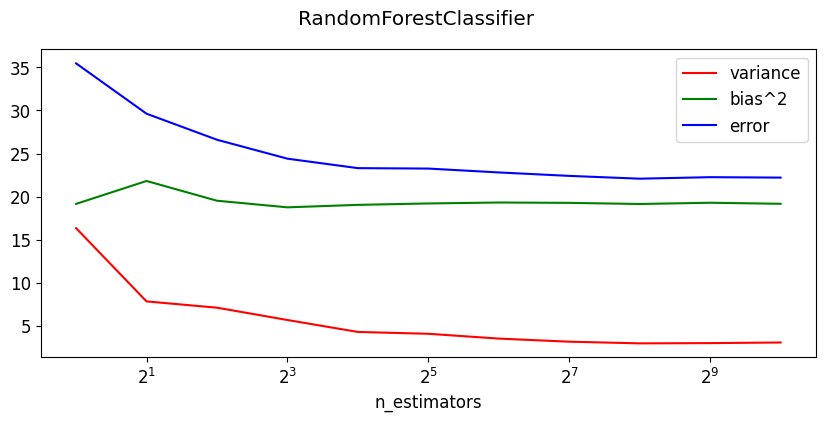

In [ ]:
rf = RandomForestClassifier(random_state=0, n_estimators=512, n_jobs=-1)
X_new = X_new.reset_index(drop=True)
y = y.reset_index(drop=True)
plot_bias_variance_rf(rf, X_new, y)

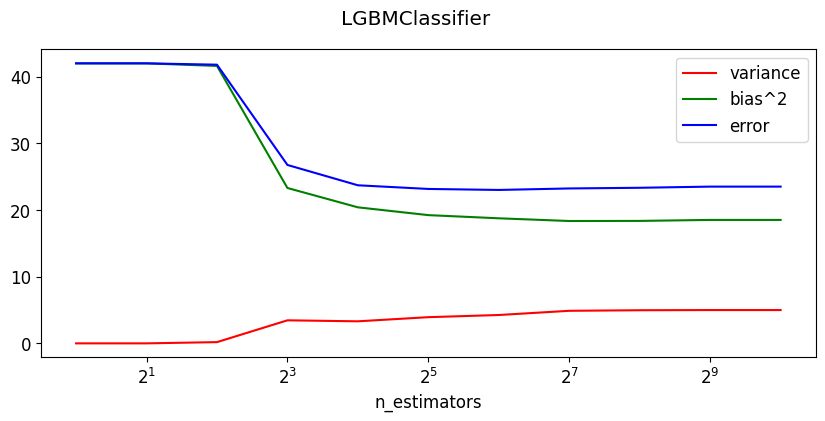

In [ ]:
gbm = LGBMClassifier(random_state=0, n_estimators=512, n_jobs=-1)
plot_bias_variance_rf(gbm, X_new, y)

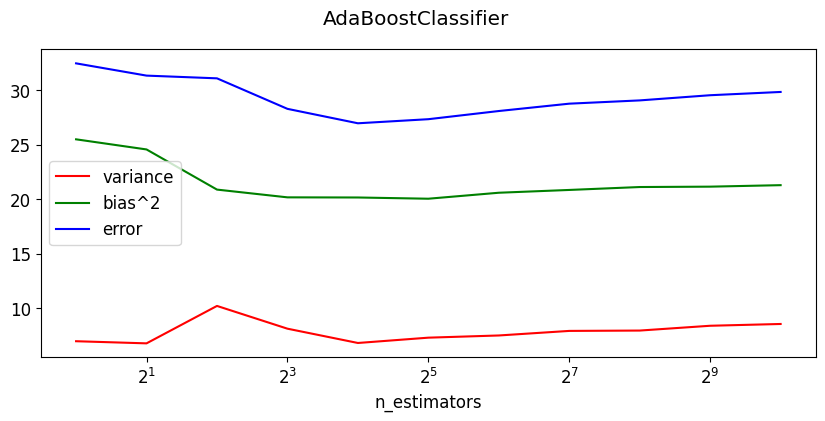

In [ ]:
ab = AdaBoostClassifier()
plot_bias_variance_rf(ab, X_new, y)

In all three models we received a relatively small scale of differnece between the bias and variance. In all of the models the bias flattens as we increase the estimators, but the bias-variance difference is the smallest in the random forest model.


Therefore, while taking into consideration the small margins between the models in our initial metrics, we will choose random forest as our model going forward.

# 4.2 Hyperparameters

In this part, we will use a gridsearch pipeline to find the best hyperparameters and re-train our model accordingly

In [ ]:
rf_param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 500],
    'randomforestclassifier__max_depth': [3, 5, 7],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

In [ ]:
def grid_search_model(X_train, y_train, pipeline, param_grid):
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = pipeline.set_params(**best_params)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_train)

    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}")
    print(f"Best F1 Score: {f1:.4f}")
    print(f"Best Recall: {recall:.4f}")

    return best_model, best_params, best_score

In [ ]:
rf_pipeline = Pipeline([
    ('randomforestclassifier', RandomForestClassifier())
])

In [ ]:
best_model, best_params, best_score = grid_search_model(X_train, y_train, rf_pipeline, rf_param_grid)

Best Parameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Best Accuracy: 0.9485
Best F1 Score: 0.9718
Best Recall: 0.9737


After the hyperparameter search, we improved the model performance significantly.

# 5. Evaluation and Optimization

# 5.1 First Results

In [ ]:
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[295   4]
 [ 11  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       299
           1       0.83      0.65      0.73        31

    accuracy                           0.95       330
   macro avg       0.90      0.82      0.85       330
weighted avg       0.95      0.95      0.95       330



Confusion matrix analysis:
*   Our true positive count is 294, the model correctly predicted the negative class 294 times
*   Our false positive count is 5, the model incorrectly predicted the positive class 5 times
*   Our false negative count is 11, the model incorrectly predicted the negative class as the positive class 11 times
*   Our true negative count is 20, the model correctly predicted the negative class 20 times

Our first perspective of the classification report is that the classifier is significantly better at finding players that are not in the hall of fame over players that are (0.96 vs 0.80 precision). We can see the same trend, though at a higher degree with the recall score that measures the true positive rate (0.98 vs 0.65).

A downside of the model would be that random forest is not ideal to handle imbalanced classes. We can see in the data understanding process that there is a big imbalance between players that are and aren't in the hall of fame.

A strong point of random forest is that it can handle multiple data types, whether they are numeric, boolean or categorical. Additionally, it is relatively resilient to overfitting which has proved to be a strong suit in our model that does not have a very large amount of samples.


# 5.2 Optimization

The main point of optimization going forward would be tackling the class imbalance issue. After performing the initial pre-processing stage we would recommed using class balancing methods, such as SMOTE (Synthetic Minority Oversampling Technique). Using a method like this would significantly help with the main issue that we had in our program, which is identifying players that are in the hall of fame. This will consequentially help build a more robust confusion matrix.



In [ ]:
url = 'https://raw.githubusercontent.com/adamnd1190/ml-project/main/csv_result-dataset_189_baseball.csv'
df_smote= pd.read_csv(url)

In [ ]:
def build_pipeline_new(data):
    return Pipeline(steps=[
    ('drop_na', drop_na(data)),
    ('lab_enc', lab_enc(data)),
    ('convert', convert(data)),
    ('remove_cols',remove_cols(data))
    ])

pipe = build_pipeline_new(df_smote)
df_pline.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,23,3298,12364,2174,3771,624,98,755,2297,1402,1383.0,0.305,0.377,0.555,0.980,Outfield,1
1,13,1165,4019,378,1022,163,19,57,366,208,499.0,0.254,0.294,0.347,0.985,Second_base,0
2,13,1424,5557,844,1588,249,48,9,394,453,223.0,0.286,0.343,0.353,0.974,Second_base,0
3,14,1281,4019,591,1082,188,49,37,303,414,447.0,0.269,0.340,0.368,0.955,Third_base,0
4,17,1959,6606,823,1832,295,35,336,1122,594,1059.0,0.277,0.339,0.485,0.994,First_base,0


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_new, y)

smote_df = pd.DataFrame(X_resampled, columns=X.columns)
smote_df['target'] = y_resampled

class_counts = smote_df['target'].value_counts()
print(class_counts)

1    1196
0    1196
Name: target, dtype: int64


Additionally, we could explore a wider range of hyper-parameters to achieve better scores. We would recommend starting with an iterative gridsearch randomizer on a very wide range of values and performing a regular grid search, but with tight margins, around the result of each iteration of the randomizer. This way we could potentially achieve better results but also maintain a viable computing time.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.25)

In [ ]:
rf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': list(range(10, 1000, 10)),
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=25, scoring='accuracy', random_state=0)
random_search.fit(X_resampled, y_resampled)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score: {:.4f}".format(random_search.best_score_))

y_pred = random_search.predict(X_test)

new_f1 = f1_score(y_test, y_pred)
new_recall = recall_score(y_test, y_pred)

print("F1 Score: {:.4f}".format(new_f1))
print("Recall: {:.4f}".format(new_recall))

Best Parameters: {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 9}
Best Accuracy Score: 0.9452
F1 Score: 0.9707
Recall: 0.9792


In [ ]:
y_pred = random_search.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[299  11]
 [  6 282]]


We have slightly improved are results using the randomizer, now we will gridsearch around the parameters we found to see if we can further improve the model.

In [ ]:
param_grid = {
    'n_estimators': list(range(171, 190)),
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'max_depth': [8, 9, 10]
}

# Perform grid search with the new parameter grid
grid_search = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)
new_gs_acc = grid_search.best_score_
print("Best Accuracy Score: {:.4f}".format(new_gs_acc))

y_pred = grid_search.predict(X_test)

new_gs_f1 = f1_score(y_test, y_pred)
new_gs_recall = recall_score(y_test, y_pred)

print("F1 Score: {:.4f}".format(new_f1))
print("Recall: {:.4f}".format(new_recall))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 179}
Best Accuracy Score: 0.9473
F1 Score: 0.9707
Recall: 0.9792


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       310
           1       0.96      0.98      0.97       288

    accuracy                           0.97       598
   macro avg       0.97      0.97      0.97       598
weighted avg       0.97      0.97      0.97       598

Confusion Matrix:
[[299  11]
 [  6 282]]


In [ ]:
train_accuracy = grid_search.score(X_resampled, y_resampled)
test_accuracy = grid_search.score(X_test, y_test)

print("Train Accuracy: {:.4f}".format(train_accuracy))
print("Test Accuracy: {:.4f}".format(test_accuracy))

Train Accuracy: 0.9854
Test Accuracy: 0.9783


After performing the optimization process, we improved all of our metrics. The major point to look at is the improved scores in the '1' class. We can also conclude that the model performs at high accuracy without overfitting.

We can also see in the confusion matrix after balancing the prediction classes and optimizing the model, that predicting TN and TF classifications are nearly at the same level.

# 5.3 Final Conclusions

In this project we tried to build a machine learning model that predicts whether a MLB player is a Hall of Fame inductee using their career statistics as predictors.

We chose significant features in our data and compared three models. Our results pointed to using the random forest model and we improved the model using gridsearch.

In the final stage of the project we analyzed the results we got and implemented changes to further improve it. We found that there was a great class imbalance in our target column that we fixed using the SMOTE algorithm to generate synthetic observations. After balancing our data, we used a gridsearch randomizer to find a set of hyperparameters. We used our result to gridsearch around the results to find the best combination in our range. These methods helped us achieve high results of accuracy in predicting our goal target.

Our final conclusions of the project are that it is possible with high accuracy to predict players that will be in the hall of fame by analyzing their career statistics. In order to fully verify the model a larger dataset is needed, as our set was not relatively large and was also synthetically expanded.